In this notebook, we explore the spread of a disease within countries (assuming no cross-infection between countries) and demonstrate how an SIR model can be applied to a number of geographic regions, and the resulting timeseries output plotted against time, and as an animated map.

In [1]:
%pylab inline
import geopandas
import pysd
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/Users/houghton/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [15]:
model = pysd.read_vensim('../../models/Epidemic/SIR.mdl')

In [3]:
model.components.contact_rate()

25

In [7]:
model.components.initial_susceptible()

859990

In [21]:
model.components._init_susceptible()

859990

In [13]:
model.components.susceptible.t

50.0

In [12]:
model.reset_state()

In [22]:
model.components.susceptible()

986.59737213427934

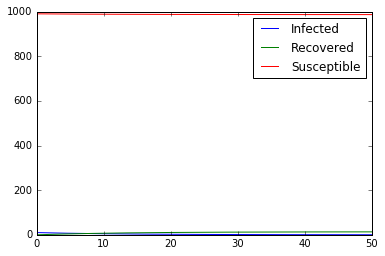

In [6]:
model.run().plot()

(30, 85)

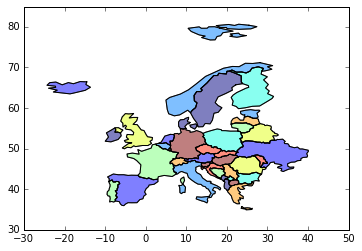

In [28]:
geo_data = geopandas.read_file('../../data/SD_Fever/Shapefile/geo_df_EU.shp')
geo_data.plot()
plt.xlim(-30,50)
plt.ylim(30,85)

In [29]:
geo_data.head()

,contact_ra,country,geometry,population
0,87.006786,Albania,"POLYGON ((20.59024743010491 41.85540416113361,...",3639453.0
1,34.968252,Austria,"POLYGON ((16.97966678230404 48.12349701597631,...",8210281.0
2,11.919454,Belgium,"POLYGON ((3.314971144228537 51.34578095153609,...",10414336.0
3,29.033685,Bulgaria,"POLYGON ((22.65714969248299 44.23492300066128,...",7204687.0
4,24.802816,Bosnia and Herzegovina,"POLYGON ((19.00548628101012 44.86023366960916,...",4613414.0


In [30]:
def runner(row):
    params = {'contact_rate': row['contact_ra'],
            'Infectivity': .9}
    initial_conditions = (0,{'susceptible': row['population']})
    res = model.run(params, initial_condition=initial_conditions)
    return res['Infected']

In [31]:
res = geo_data.apply(runner, axis=1)

In [34]:
res.T

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.1875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.4375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
pd.DataFrame(res)

,0.0,0.0625,0.125,0.1875,0.25,0.3125,0.375,0.4375,0.5,0.5625,...,49.4375,49.5,49.5625,49.625,49.6875,49.75,49.8125,49.875,49.9375,50.0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


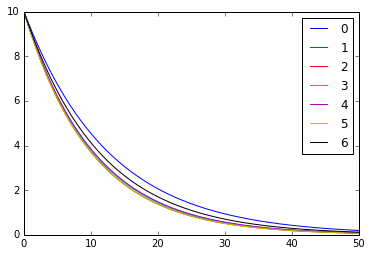

In [50]:
pd.DataFrame(res.loc[:6].T).plot()

In [9]:
def runner(row):
    params = {}
    res = model.run(params, return_timestamps=range(0,360,30),
                    return_columns=['Infected'])
    return res['Infected'].round()
runner()

0       10.0
30     176.0
60      10.0
90       1.0
120      0.0
150      0.0
180      0.0
210      0.0
240      0.0
270      0.0
300      0.0
330      0.0
Name: Infected, dtype: float64

In [ ]:
geo_data.apply(runner)